# Domácí úkol 2
## 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.
### Načtení souborů:

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

f1 = open('../source/011.txt', 'r')
f2 = open('../source/006.txt', 'r')
f1_lines = f1.readlines()[1:];     # Read lines except the first one
f2_lines = f2.readlines()[1:];     # Read lines except the first one

### Střední hodnota a rozptyl délek slov:

Pro určení střední hodnoty a rozptylu použijeme níže uvedené bodové odhady (pro samotný výpočet použijeme funkce z knihovny numpy).

* Výběrový průměr (bodový odhad střední hodnoty), který je určen následujícím vztahem:
$$\bar{X}_n = \frac{1}{n} \sum_{i = 1}^{n} X_i.$$

* Výběrový rozptyl (bodový odhad rozptylu), který je určen následujícím vztahem:
$$s_{n}^{2} = \frac{1}{n - 1} \sum_{i = 1}^{n} (X_i - \bar{X}_n)^2.$$

In [82]:
def words_length(lines) -> list[int]:
    # Split lines to words
    words = []
    for l in lines:
        words.extend(len(word) for word in l.split())
    return words

X1 = np.array(words_length(f1_lines))
n1 = X1.shape[0]
xbar1 = X1.mean()
s21 = pow(X1.std(ddof=1), 2) # ddof=1 dává nestranný odhad 1/(n-1)*sum((X-mu)**2)

X2 = np.array(words_length(f2_lines))
n2 = X2.shape[0]
xbar2 = X2.mean()
s22 = pow(X2.std(ddof=1), 2)

print('První text {}:'.format(f1.name))
print('Celkem slov = %d\nStřední hodnota = %.5f\nRozptyl = %.5f' %(n1,xbar1,s21))
print('-'*50)
print('Druhý text {}:'.format(f2.name))
print('Celkem slov = %d\nStřední hodnota = %.5f\nRozptyl = %.5f' %(n2,xbar2,s22))

První text ../source/011.txt:
Celkem slov = 1260
Střední hodnota = 3.86032
Rozptyl = 4.53965
--------------------------------------------------
Druhý text ../source/006.txt:
Celkem slov = 1140
Střední hodnota = 4.10965
Rozptyl = 4.33301


## 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Pro každý soubor zvlášť projdeme načtený text (první řádka má být dle zadání ignorována) a spočítáme výskyty jednotlivých písmen. Pravděpodobnosti pro jednotlivá písmena poté získáme následujícím bodovým odhadem:
$$p_i = \frac{\text{počet výskytů i-tého písmene}}{\text{celkový počet písmen}},$$
kde $p_i$ je pravděpodobnost i-tého písmene.

In [83]:
def letter_probabilities(lines) -> list[tuple[str, float]]:
    # Parse lines to characters
    chars = []
    for l in lines:
        chars.extend(c for c in l)

    # Count letters occurrences
    letters_count = 0
    occ = {}
    for c in chars:
        if not c.isspace():
            letters_count += 1
            if c in occ:
                occ[c] += 1
            else:
                occ[c] = 1

    # Count letter probabilities
    probabilities = {}
    for c, count in occ.items():
        probabilities[c] = count / letters_count

    # Sort and return probabilities
    return [(k, v) for k, v in sorted(probabilities.items(), key=lambda item: item[1], reverse=True)]

probabilities1 = letter_probabilities(f1_lines)
probabilities2 = letter_probabilities(f2_lines)
print('Pravděpodobnosti jednotlivých písmen v textu {} jsou:\n{}'.format(f1.name, probabilities1))
print('-'*50)
print('Pravděpodobnosti jednotlivých písmen v textu {} jsou:\n{}'.format(f2.name, probabilities2))

Pravděpodobnosti jednotlivých písmen v textu ../source/011.txt jsou:
[('e', 0.11122532894736842), ('t', 0.09724506578947369), ('o', 0.09046052631578948), ('a', 0.07401315789473684), ('h', 0.06681743421052631), ('n', 0.06476151315789473), ('i', 0.06188322368421053), ('s', 0.06147203947368421), ('r', 0.05345394736842105), ('d', 0.04954769736842105), ('l', 0.04009046052631579), ('u', 0.03186677631578947), ('m', 0.031044407894736843), ('y', 0.02549342105263158), ('w', 0.02446546052631579), ('f', 0.020764802631578948), ('c', 0.019120065789473683), ('g', 0.01768092105263158), ('p', 0.01665296052631579), ('b', 0.016241776315789474), ('k', 0.01274671052631579), ('v', 0.008634868421052632), ('j', 0.0024671052631578946), ('x', 0.0010279605263157894), ('q', 0.0006167763157894736), ('z', 0.00020559210526315788)]
--------------------------------------------------
Pravděpodobnosti jednotlivých písmen v textu ../source/006.txt jsou:
[('e', 0.1304162219850587), ('t', 0.08196371398078975), ('n', 0.0783

### Zobrazení získaných praděpodobností písmen pomocí grafů:

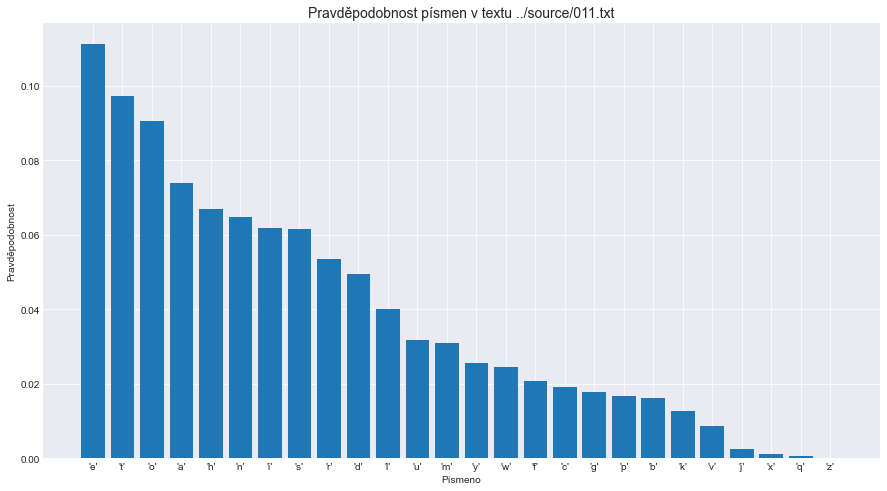

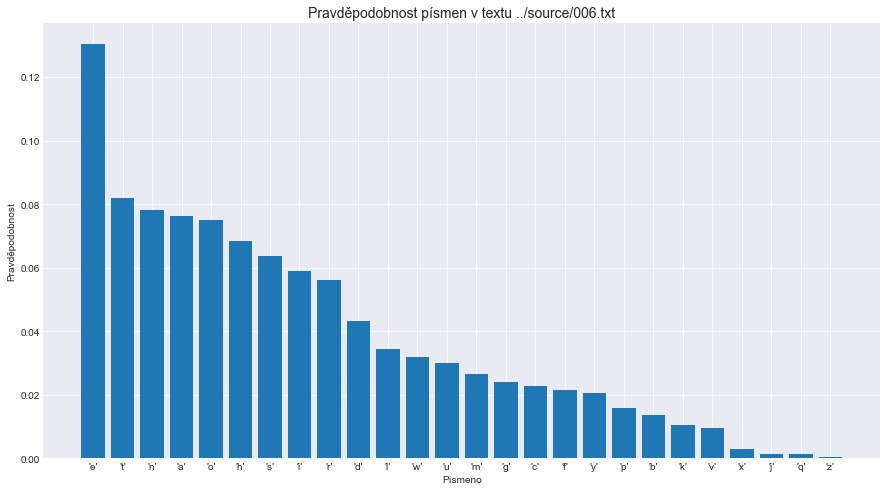

In [84]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use('seaborn-darkgrid')

def plot_probabilities(data, filename):
    plt.xlabel('Písmeno')
    plt.ylabel('Pravděpodobnost')
    x_values = range(len(data))
    plt.bar(x_values, [probability for char, probability in data])
    plt.xticks(x_values, ['\'{}\''.format(char) for char, probability in data])
    plt.title('Pravděpodobnost písmen v textu {}'.format(filename), fontsize=14)
    plt.show()

plot_probabilities(probabilities1, f1.name)
plot_probabilities(probabilities2, f2.name)

## 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

## 4. Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

## 5. Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.